### **Wrangle a Dataset Project**

## **Introduction**

This project involves wrangling (and analyzing and visualizing) the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

## **Gathering Data**

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy
import json


In [ ]:
#Reading the twitter-archive data
twitter_archive_data = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [ ]:
#Fetching tweets from twitter using the twitter API
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
#Let's use a for loop to get the tweets and add each tweet as a new line of tweet-json.txt file
with open('tweet-json.txt', 'a', encoding='utf8') as Mydata:
    for tweet_id in twitter_archive_data['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, Mydata)
            Mydata.write('\n')
        except:
            continue
          

            

Rate limit reached. Sleeping for: 452


https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

In [ ]:
#Importing the twitter_json.txt and reading it line by line
twitter_list = []

# Using a for loop, we will read the JSON file line by line and appending the content in a list
for line in open('tweet-json.txt', 'r'):
    twitter_data = json.loads(line)
    twitter_list.append({'tweet_id': twitter_data['id'],
                        'retweet_count': twitter_data['retweet_count'],
                        'favorite_count': twitter_data['favorite_count']})

#Creating a data frame from the data extracted from the json file
tweets = pd.DataFrame(twitter_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
tweets



,tweet_id,retweet_count,favorite_count
0,892420643555336193,6997,33763
1,892177421306343426,5297,29294
2,891815181378084864,3476,22031
3,891689557279858688,7219,36900
4,891327558926688256,7751,35286
...,...,...,...
2322,666049248165822465,37,89
2323,666044226329800704,115,247
2324,666033412701032449,36,100
2325,666029285002620928,39,112


In [ ]:
9#Reading the images dataset
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', mode = 'wb') as file:
  file.write(response.content)

dog_images = pd.read_csv('image-predictions.tsv', sep='\t')
dog_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## **Assessing Data**

In [ ]:
twitter_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [ ]:
twitter_archive_data.duplicated().sum()

0

In [ ]:
twitter_archive_data['tweet_id'] = twitter_archive_data['tweet_id'].astype('str')

In [ ]:
twitter_archive_data.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

The dataset contains data some of which are not dogs and dog breads and should be removed during cleaning. 

**Quality Issues**

Twitter archive enhanced

From the assesment above, there are several issues that arise:
1. There are 78 replies in the in both the in_reply_to_status_id and in_reply_to_user_id columns. 
2. timestamp and retweeted_status_timestamp columns should be datetime format and not objects
3. The retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp contain only 181 retweets
4. Missing URLs in the expanded url column
5. The expanded_urls  seems to be having some missing values
6. Null values have been recorded as None and Nan.


In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [ ]:
tweets.describe()

,tweet_id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2468.150838,7045.171895
std,6.820795e+16,4179.920566,10947.733623
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,493.500000,1224.000000
50%,7.178418e+17,1148.000000,3046.000000
75%,7.986547e+17,2858.000000,8596.500000
max,8.924206e+17,70643.000000,144749.000000


In [ ]:
#Checking for duplicates
tweets.duplicated().count()

2327

Tweet-json

1. Some tweets are missng

In [ ]:
dog_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Image Prediction

1. Incorrect datatype of tweet_id

**Tidiness Issues**

Twitter-enhanced-archive

1.  According to the Dogtionary, Floofer should be floof
2. The tweet_id should be formatted as objects 

## **Cleaning Data**

In [ ]:
#Creating copies of the original data
twitter_archive_clean = twitter_archive_data.copy()
dog_images_clean = dog_images.copy()
tweets_clean = tweets.copy()

In [ ]:
#Converting timestamp to a datetime format
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

In [ ]:
#Let's start by dropping unnecessary columns in twitter_archive_clean
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis=1, inplace=True)
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   text                2356 non-null   object             
 3   rating_numerator    2356 non-null   int64              
 4   rating_denominator  2356 non-null   int64              
 5   name                2356 non-null   object             
 6   doggo               2356 non-null   object             
 7   floofer             2356 non-null   object             
 8   pupper              2356 non-null   object             
 9   puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 184.2+ KB


In [ ]:
#Assesing the name column
twitter_archive_clean.name.describe()

count     2356
unique     957
top       None
freq       745
Name: name, dtype: object

In [ ]:
#The tweets_clean identifier column is called id let's rename it tweet_id for easy merging of the datasets later
tweets_clean.rename(columns={"id":"tweet_id"}, inplace=True)
tweets_clean

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6997,33763
1,892177421306343426,5297,29294
2,891815181378084864,3476,22031
3,891689557279858688,7219,36900
4,891327558926688256,7751,35286
...,...,...,...
2322,666049248165822465,37,89
2323,666044226329800704,115,247
2324,666033412701032449,36,100
2325,666029285002620928,39,112


In [ ]:
#Dropping columns that have missing values
twitter_archive_clean.dropna(axis='columns', how='any', inplace=True)

In [ ]:
#Renaming the floofer column as floof
twitter_archive_clean.rename(columns={'floofer':'floof'}, inplace=True)

In [ ]:
dog_images_clean.p3.head(5)

0      Shetland_sheepdog
1    Rhodesian_ridgeback
2             bloodhound
3     miniature_pinscher
4               Doberman
Name: p3, dtype: object

In [ ]:
#converting the tweet_id columns to strings
dog_images_clean['tweet_id'] = dog_images_clean['tweet_id'].astype('str')
tweets_clean['tweet_id'] = tweets_clean['tweet_id'].astype('str')

In [ ]:
#Let's merge the three data sources into one using the common field tweet_id
weratedogs_merged = pd.merge(twitter_archive_clean, tweets_clean, on="tweet_id", how = 'outer') 

In [ ]:
weratedogs_merged = pd.merge(weratedogs_merged, dog_images_clean, on='tweet_id', how ='outer')
weratedogs_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   text                2356 non-null   object             
 3   rating_numerator    2356 non-null   int64              
 4   rating_denominator  2356 non-null   int64              
 5   name                2356 non-null   object             
 6   doggo               2356 non-null   object             
 7   floof               2356 non-null   object             
 8   pupper              2356 non-null   object             
 9   puppo               2356 non-null   object             
 10  retweet_count       2327 non-null   float64            
 11  favorite_count      2327 non-null   float64            
 12  jpg_url             2075 non-null 

## **Storing Data**

This step involves saving the merged dataset to a csv file

In [ ]:
weratedogs_merged.to_csv(path_or_buf='twitter_archive_master.csv', index=False)

## **Analyzing, and Visualizing Data**

1. What is the trend of retweet count and favorite count over time?





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


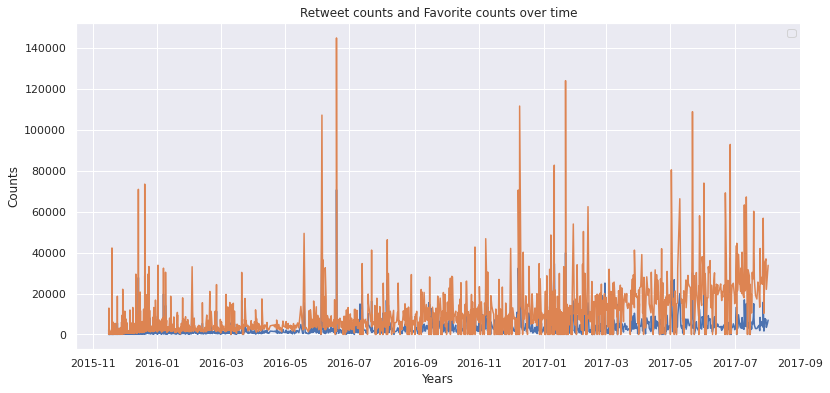

In [ ]:
# I am interested in knowing the trends in retweet_count and favorite_count over time
sns.set(rc={'figure.figsize':(13,6)}) 
fig,ax = plt.subplots()
sns.lineplot(weratedogs_merged['timestamp'], weratedogs_merged['retweet_count'])
sns.lineplot(weratedogs_merged['timestamp'], weratedogs_merged['favorite_count'])
ax.legend()
ax.set_title('Retweet counts and Favorite counts over time')
ax.set_ylabel('Counts')
ax.set_xlabel('Years');

2. What is the correlation between rating_numerator,rating_numerator, retweet_count, favorite_count,p1_conf,p2_conf and p3_conf 


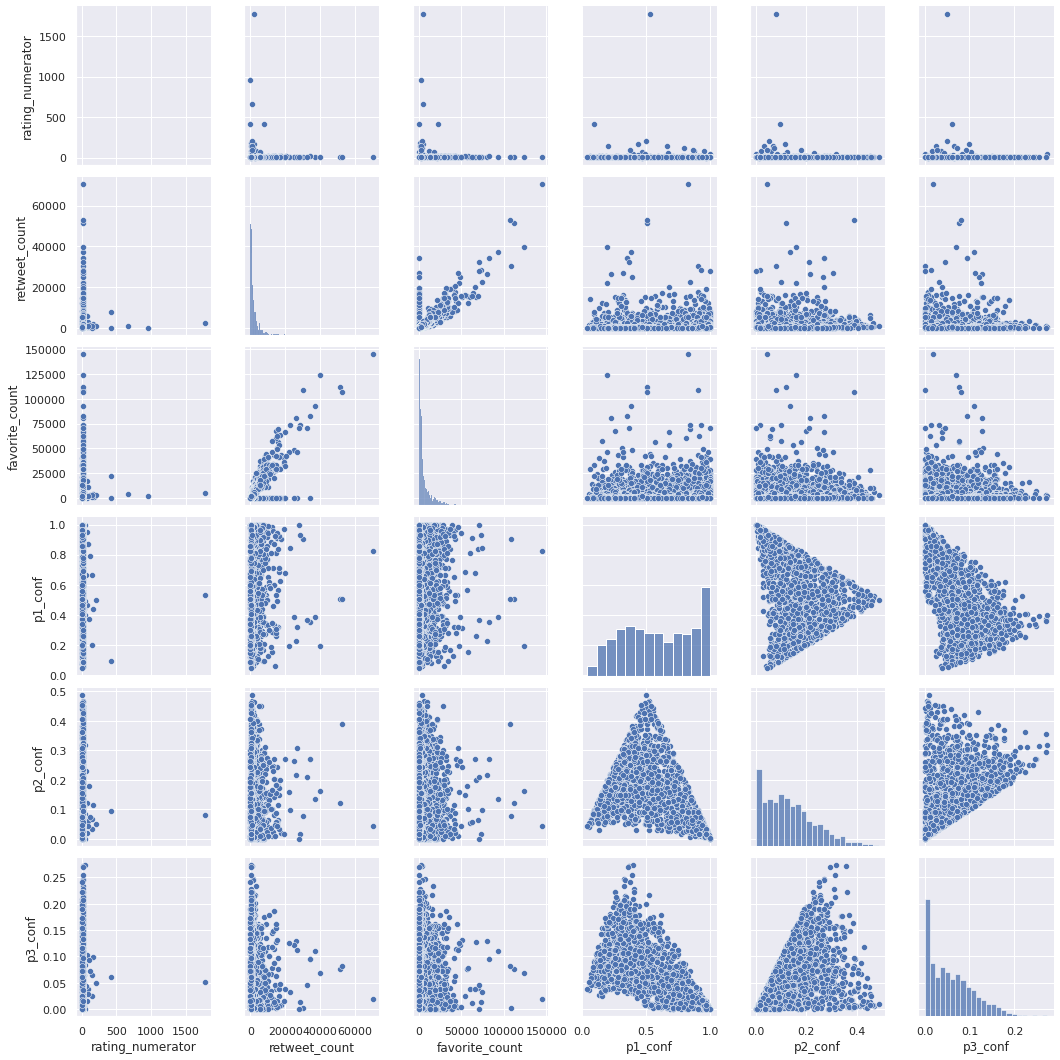

In [ ]:
#Let's create a correlation between the rating_numerator, retweet_count, favorite_count,p1_conf,p2_conf and p3_conf 

sns.pairplot(weratedogs_merged, vars=['rating_numerator', 'retweet_count','favorite_count', 'p1_conf', 'p2_conf','p3_conf'])

3. What are the most common dogs

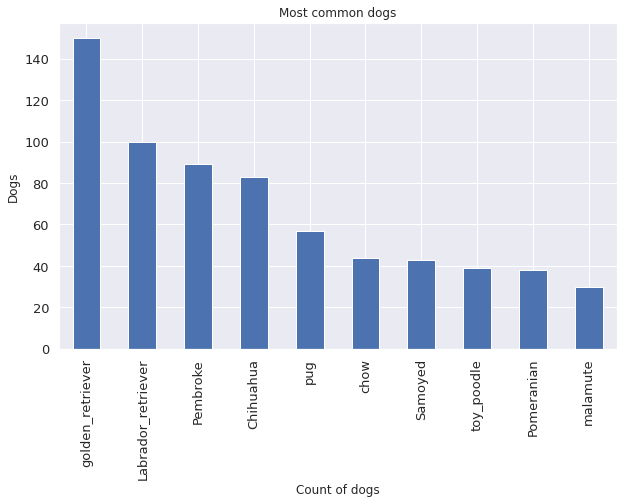

In [ ]:
#Let's get a count of the dog breed
counts = weratedogs_merged['p1'].value_counts()[0:10].sort_values(ascending=False)
counts.plot(kind='bar', figsize=(10,6), fontsize=13)
plt.xlabel('Count of dogs')
plt.ylabel('Dogs')
plt.title('Most common dogs');


Text(0, 0.5, 'Favorite Count')

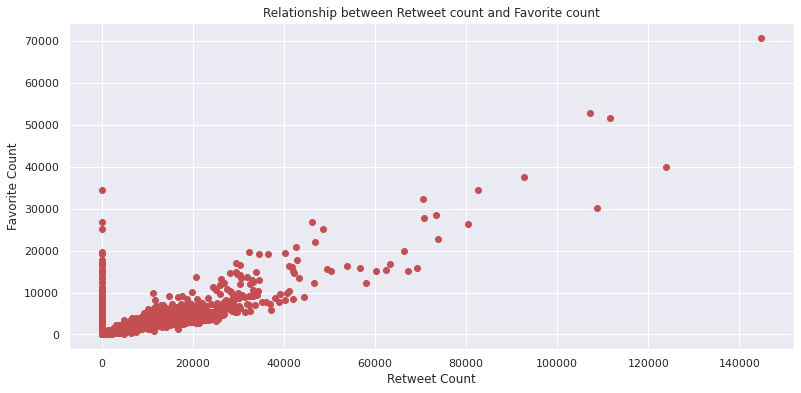

In [ ]:
plt.scatter(weratedogs_merged.favorite_count, weratedogs_merged.retweet_count, color='r')
plt.title('Relationship between Retweet count and Favorite count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
